In [50]:
import scipy.io as io
import numpy as np

y=io.loadmat("D:\\机器学习前沿实验\\实验课一\\dataset\\OCD_90_200_fMRI.mat")

In [51]:
y

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Sep 15 16:14:34 2021',
 '__version__': '1.0',
 '__globals__': [],
 'NC': array([[[ 1.71912421e+00,  2.21270511e+00,  1.68960500e+00, ...,
           1.33252308e+00,  4.65957680e-01, -6.88871296e-01],
         [ 2.13050475e+00,  2.21960901e+00,  1.29836480e+00, ...,
           2.98712160e-01, -5.18081209e-01, -1.11117704e+00],
         [ 1.08634990e-01,  7.12645125e-01,  1.27033019e+00, ...,
           1.36868045e+00,  1.27166899e+00,  7.43193650e-01],
         ...,
         [ 6.08532543e-01,  6.31457518e-01, -2.19204338e-01, ...,
           1.33883737e+00,  2.30229148e+00,  1.95279573e+00],
         [-2.64155910e-02, -6.53182273e-02, -4.18536691e-02, ...,
           5.92263029e-01,  7.59156459e-01,  4.98339401e-01],
         [-4.85977772e-02,  3.56739070e-02, -1.00098887e-01, ...,
           8.56619253e-01,  1.01913200e+00,  6.93397817e-01]],
 
        [[-1.43473728e+00, -1.83086463e+00, -1.62762613e+00, ...,
    

# 为数组打上标签 
#NC=0
#OCD=1

In [52]:
NC=np.asarray(y['NC'])
NC_lable=np.full((NC.shape[0],1),0,dtype=int)

In [53]:
NC.shape

(20, 90, 200)

# 记录数组维度方便后续转化

In [54]:
m=NC.shape[1]
n=NC.shape[2]

In [55]:
OCD=np.asarray(y['OCD'])
OCD_lable=np.full((OCD.shape[0],1),1,dtype=int)

In [56]:
OCD.shape

(62, 90, 200)

In [57]:
print(NC_lable.shape)
print(OCD_lable.shape)

(20, 1)
(62, 1)


# 将数据转换为2维，方便后续数据划分

In [58]:
x = NC.reshape(NC.shape[0],-1)
y = OCD.reshape(OCD.shape[0],-1)

# 将数据合并

In [59]:
Label=np.vstack((NC_lable,OCD_lable))
Data=np.vstack((x,y))
Data=Data.reshape(-1,m, n)

# 将数据转换为原本的维度

In [60]:
import time
import warnings
import numpy as np
import time
import matplotlib.pyplot as plt
from numpy import newaxis
import pandas as pd

In [61]:
from keras.models import Sequential
from keras.layers import Bidirectional,LSTM
from keras.layers.core import Dense, Activation, Dropout

In [62]:
'''
import keras.backend as K
from keras.callbacks import LearningRateScheduler
 
def scheduler(epoch):
    # 每隔5个epoch，学习率减小为原来的1/10
    if epoch % 5 == 0 and epoch != 0:
        lr = K.get_value(model.optimizer.lr*0.1)
        K.set_value(model.optimizer.lr, lr * 0.1)
        print("lr changed to {}".format(lr * 0.1))
    return K.get_value(model.optimizer.lr)
 
reduce_lr = LearningRateScheduler(scheduler)

'''

'\nimport keras.backend as K\nfrom keras.callbacks import LearningRateScheduler\n \ndef scheduler(epoch):\n    # 每隔5个epoch，学习率减小为原来的1/10\n    if epoch % 5 == 0 and epoch != 0:\n        lr = K.get_value(model.optimizer.lr*0.1)\n        K.set_value(model.optimizer.lr, lr * 0.1)\n        print("lr changed to {}".format(lr * 0.1))\n    return K.get_value(model.optimizer.lr)\n \nreduce_lr = LearningRateScheduler(scheduler)\n\n'

In [63]:
from tensorflow.keras.utils import to_categorical
Label = to_categorical(Label)

In [64]:
x=Data.transpose((0,2,1))
x=np.asarray(x)

In [65]:
x.shape

(82, 200, 90)

In [66]:
Label.shape

(82, 2)

In [67]:
import time
import warnings
import numpy as np
import time
import matplotlib.pyplot as plt
from numpy import newaxis
import pandas as pd
from keras.models import Sequential
from keras.layers import Bidirectional,LSTM
from keras.layers.core import Dense, Activation, Dropout
import keras.backend as K
import keras.layers as layers
from keras.callbacks import LearningRateScheduler


def scheduler(epoch):
    # 每隔5个epoch，学习率减小为原来的1/10-lstm
    #if epoch % 5 == 0 and epoch != 0:
    if epoch % 10 == 0 and epoch != 0:
        #lr = K.get_value(model.optimizer.lr*0.001)#LSTM
        lr = K.get_value(model.optimizer.lr*10) #一维卷积
        K.set_value(model.optimizer.lr, lr * 0.1)
        print("lr changed to {}".format(lr * 0.1))
    return K.get_value(model.optimizer.lr)
 
reduce_lr = LearningRateScheduler(scheduler)

# LSTM

In [68]:

def built_model():
    model = Sequential() #layers [128,64,32,16,4]
    model.add(LSTM(input_shape=(None,90),units=200,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(input_shape=(None,200),units=128,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(input_shape=(None,128),units=64,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32,return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=2))
    #model.add(Activation("linear"))
    model.add(Activation("softmax"))
    start = time.time()
    model.compile(optimizer = 'rmsprop',      # 加速神经网络
        loss = 'categorical_crossentropy',   # 损失函数
        metrics = ['accuracy'], )
    return model
model=built_model()
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, None, 200)         232800    
                                                                 
 dropout_24 (Dropout)        (None, None, 200)         0         
                                                                 
 lstm_25 (LSTM)              (None, None, 128)         168448    
                                                                 
 dropout_25 (Dropout)        (None, None, 128)         0         
                                                                 
 lstm_26 (LSTM)              (None, None, 64)          49408     
                                                                 
 dropout_26 (Dropout)        (None, None, 64)          0         
                                                                 
 lstm_27 (LSTM)              (None, 32)              

# 一维卷积

In [69]:
# def built_model():
#     model = Sequential()
#     model.add(layers.Convolution1D(128,3,strides=1))
#     model.add(layers.LayerNormalization())
#     model.add(Activation('relu'))
#     model.add(layers.Convolution1D(256,3,strides=1))
#     model.add(layers.LayerNormalization())
#     model.add(Activation('relu'))
#     model.add(layers.Convolution1D(128,3,strides=1))
#     model.add(layers.LayerNormalization())
#     model.add(Activation('relu'))
#     model.add(layers.GlobalAveragePooling1D())
#     model.add(Dense(2, activation='softmax'))
#     model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])
#     return model

In [70]:
#     model = Sequential()
#     model.add(layers.Convolution1D(128,3,strides=1))
#     model.add(layers.LayerNormalization())
#     model.add(Activation('relu'))
#     model.add(layers.Convolution1D(256,3,strides=1))
#     model.add(layers.LayerNormalization())
#     model.add(Activation('relu'))
#     model.add(layers.Convolution1D(128,3,strides=1))
#     model.add(layers.LayerNormalization())
#     model.add(Activation('relu'))
#     model.add(layers.GlobalAveragePooling1D())
#     model.add(Dense(2, activation='softmax'))
#     model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])
#     model.build(input_shape=(None,200,90))
#     model.summary()
    

In [71]:
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn import metrics

kf = KFold(n_splits=5, shuffle=True,random_state=42) # 5折交叉验证

i = 1
a=[]
h=np.asarray(x)
Label=np.asarray(Label)
for train_index, test_index in kf.split(h, Label):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train, X_test = h[train_index], h[test_index] 
    y_train, y_test = Label[train_index], Label[test_index]
    model=built_model()
    #history=model.fit(X_train,y_train,batch_size=3,epochs=10,validation_data=(X_test,y_test),callbacks=[reduce_lr]) #LSTM
    history=model.fit(X_train,y_train,batch_size=5,epochs=60,validation_data=(X_test,y_test),callbacks=[reduce_lr]) #一维卷积
    x=np.asarray(history.history['accuracy']), 
    y=np.asarray(history.history['val_accuracy'])
    b=np.asarray(y)
    a.append(b.max())
    i += 1
    model.save(f"1dConv-Fold{i}")


1 of kfold 5
Epoch 1/60
13/13 [==============================] - 23s 1s/step - loss: 0.6307 - accuracy: 0.6615 - val_loss: 0.6441 - val_accuracy: 0.7059 - lr: 0.0010
Epoch 2/60
13/13 [==============================] - 13s 989ms/step - loss: 0.3307 - accuracy: 0.8462 - val_loss: 0.9097 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 3/60
13/13 [==============================] - 12s 953ms/step - loss: 0.1204 - accuracy: 0.9846 - val_loss: 0.9763 - val_accuracy: 0.5882 - lr: 0.0010
Epoch 4/60
13/13 [==============================] - 12s 952ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 1.1603 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 5/60
13/13 [==============================] - 12s 946ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.2003 - val_accuracy: 0.7059 - lr: 0.0010
Epoch 6/60
13/13 [==============================] - 13s 979ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.2692 - val_accuracy: 0.7059 - lr: 0.0010
Epoch 7/60
13/13 [==============================] - 1

13/13 [==============================] - 12s 898ms/step - loss: 6.4190e-08 - accuracy: 1.0000 - val_loss: 6.2035 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 52/60
13/13 [==============================] - 12s 900ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 6.2086 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 53/60
13/13 [==============================] - 12s 908ms/step - loss: 1.2838e-08 - accuracy: 1.0000 - val_loss: 6.2290 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 54/60
13/13 [==============================] - 12s 897ms/step - loss: 2.2008e-08 - accuracy: 1.0000 - val_loss: 6.2666 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 55/60
13/13 [==============================] - 12s 907ms/step - loss: 7.3360e-09 - accuracy: 1.0000 - val_loss: 6.2816 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 56/60
13/13 [==============================] - 12s 897ms/step - loss: 1.8340e-09 - accuracy: 1.0000 - val_loss: 6.2933 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 57/60
13/13 [===========================

INFO:tensorflow:Assets written to: 1dConv-Fold2\assets


INFO:tensorflow:Assets written to: 1dConv-Fold2\assets



2 of kfold 5
Epoch 1/60
13/13 [==============================] - 20s 1s/step - loss: 0.6590 - accuracy: 0.7077 - val_loss: 0.5393 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 2/60
13/13 [==============================] - 13s 1s/step - loss: 0.4409 - accuracy: 0.8154 - val_loss: 0.6044 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 3/60
13/13 [==============================] - 14s 1s/step - loss: 0.1457 - accuracy: 0.9692 - val_loss: 0.5839 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 4/60
13/13 [==============================] - 14s 1s/step - loss: 0.0740 - accuracy: 0.9692 - val_loss: 0.8988 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 5/60
13/13 [==============================] - 14s 1s/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 1.0025 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 6/60
13/13 [==============================] - 14s 1s/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1.1196 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 7/60
13/13 [==============================] - 14s 1s/step - lo

Epoch 52/60
13/13 [==============================] - 9s 708ms/step - loss: 1.4672e-08 - accuracy: 1.0000 - val_loss: 3.5100 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 53/60
13/13 [==============================] - 9s 707ms/step - loss: 1.8340e-08 - accuracy: 1.0000 - val_loss: 3.5241 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 54/60
13/13 [==============================] - 9s 707ms/step - loss: 5.5020e-09 - accuracy: 1.0000 - val_loss: 3.5310 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 55/60
13/13 [==============================] - 9s 708ms/step - loss: 2.0174e-08 - accuracy: 1.0000 - val_loss: 3.5489 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 56/60
13/13 [==============================] - 9s 710ms/step - loss: 1.6506e-08 - accuracy: 1.0000 - val_loss: 3.5664 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 57/60
13/13 [==============================] - 9s 711ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.5698 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 58/60
13/13 [=====================

INFO:tensorflow:Assets written to: 1dConv-Fold3\assets


INFO:tensorflow:Assets written to: 1dConv-Fold3\assets



3 of kfold 5
Epoch 1/60
14/14 [==============================] - 16s 812ms/step - loss: 0.5287 - accuracy: 0.7273 - val_loss: 1.0436 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/60
14/14 [==============================] - 10s 713ms/step - loss: 0.3046 - accuracy: 0.8636 - val_loss: 0.7245 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/60
14/14 [==============================] - 10s 706ms/step - loss: 0.0599 - accuracy: 1.0000 - val_loss: 1.1742 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 4/60
14/14 [==============================] - 10s 699ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 1.0201 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/60
14/14 [==============================] - 10s 703ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 1.0483 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/60
14/14 [==============================] - 10s 700ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.1982 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/60
14/14 [==============================] 

14/14 [==============================] - 10s 696ms/step - loss: 7.2248e-09 - accuracy: 1.0000 - val_loss: 6.9474 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 52/60
14/14 [==============================] - 10s 697ms/step - loss: 2.1674e-08 - accuracy: 1.0000 - val_loss: 6.9536 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 53/60
14/14 [==============================] - 10s 703ms/step - loss: 3.4318e-08 - accuracy: 1.0000 - val_loss: 7.0747 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 54/60
14/14 [==============================] - 10s 698ms/step - loss: 7.2248e-09 - accuracy: 1.0000 - val_loss: 7.0986 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 55/60
14/14 [==============================] - 10s 699ms/step - loss: 3.6124e-08 - accuracy: 1.0000 - val_loss: 7.1635 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 56/60
14/14 [==============================] - 10s 697ms/step - loss: 2.3481e-08 - accuracy: 1.0000 - val_loss: 7.2073 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 57/60
14/14 [===========================

INFO:tensorflow:Assets written to: 1dConv-Fold4\assets


INFO:tensorflow:Assets written to: 1dConv-Fold4\assets



4 of kfold 5
Epoch 1/60
14/14 [==============================] - 17s 871ms/step - loss: 0.6197 - accuracy: 0.7121 - val_loss: 0.4903 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 2/60
14/14 [==============================] - 11s 790ms/step - loss: 0.4431 - accuracy: 0.8485 - val_loss: 0.3783 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/60
14/14 [==============================] - 11s 792ms/step - loss: 0.2765 - accuracy: 0.8939 - val_loss: 0.8621 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 4/60
14/14 [==============================] - 11s 782ms/step - loss: 0.0724 - accuracy: 0.9848 - val_loss: 0.5313 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/60
14/14 [==============================] - 11s 788ms/step - loss: 0.1473 - accuracy: 0.9545 - val_loss: 0.4818 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 6/60
14/14 [==============================] - 11s 784ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.5217 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 7/60
14/14 [==============================] 

14/14 [==============================] - 11s 808ms/step - loss: 7.2248e-09 - accuracy: 1.0000 - val_loss: 2.5005 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 52/60
14/14 [==============================] - 11s 816ms/step - loss: 1.0837e-08 - accuracy: 1.0000 - val_loss: 2.5102 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 53/60
14/14 [==============================] - 14s 979ms/step - loss: 7.2248e-09 - accuracy: 1.0000 - val_loss: 2.5172 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 54/60
14/14 [==============================] - 16s 1s/step - loss: 2.1674e-08 - accuracy: 1.0000 - val_loss: 2.5285 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 55/60
14/14 [==============================] - 16s 1s/step - loss: 7.2248e-09 - accuracy: 1.0000 - val_loss: 2.5345 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 56/60
14/14 [==============================] - 16s 1s/step - loss: 9.0310e-09 - accuracy: 1.0000 - val_loss: 2.5407 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 57/60
14/14 [==============================] - 16

INFO:tensorflow:Assets written to: 1dConv-Fold5\assets


INFO:tensorflow:Assets written to: 1dConv-Fold5\assets



5 of kfold 5
Epoch 1/60
14/14 [==============================] - 27s 1s/step - loss: 0.6352 - accuracy: 0.7121 - val_loss: 0.5445 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 2/60
14/14 [==============================] - 17s 1s/step - loss: 0.3297 - accuracy: 0.8636 - val_loss: 0.8419 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 3/60
14/14 [==============================] - 17s 1s/step - loss: 0.1132 - accuracy: 0.9848 - val_loss: 1.2639 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/60
14/14 [==============================] - 17s 1s/step - loss: 0.0286 - accuracy: 1.0000 - val_loss: 1.0171 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 5/60
14/14 [==============================] - 18s 1s/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.2083 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 6/60
14/14 [==============================] - 18s 1s/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.4178 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 7/60
14/14 [==============================] - 18s 1s/step - lo

Epoch 52/60
14/14 [==============================] - 17s 1s/step - loss: 1.0837e-08 - accuracy: 1.0000 - val_loss: 3.3635 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 53/60
14/14 [==============================] - 17s 1s/step - loss: 1.8062e-08 - accuracy: 1.0000 - val_loss: 3.3573 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 54/60
14/14 [==============================] - 17s 1s/step - loss: 9.0310e-09 - accuracy: 1.0000 - val_loss: 3.3587 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 55/60
14/14 [==============================] - 17s 1s/step - loss: 1.0837e-08 - accuracy: 1.0000 - val_loss: 3.3663 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 56/60
14/14 [==============================] - 17s 1s/step - loss: 2.3481e-08 - accuracy: 1.0000 - val_loss: 3.3619 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 57/60
14/14 [==============================] - 17s 1s/step - loss: 9.0310e-09 - accuracy: 1.0000 - val_loss: 3.3680 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 58/60
14/14 [==============================] -

INFO:tensorflow:Assets written to: 1dConv-Fold6\assets


INFO:tensorflow:Assets written to: 1dConv-Fold6\assets


In [72]:
a=np.asarray(a)
print(a.mean())

0.816911768913269


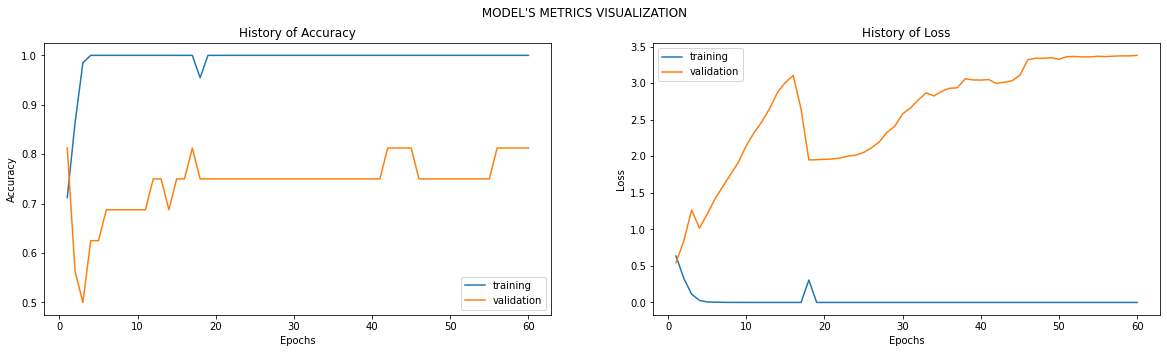

In [73]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    


    plt.show()
    
import matplotlib.pyplot as plt
Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
              )

In [ ]:
model.fit(x,Label,batch_size=5,epochs=10,validation_split=0.2,callbacks=[reduce_lr])